In [1]:
import numpy as np
import os, sys, cv2
import matplotlib.pyplot as plt
from pylsd.lsd import lsd

# With OpenCV

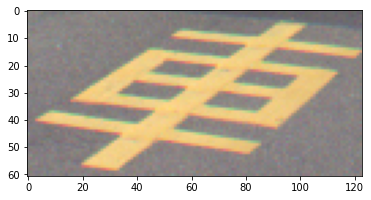

In [2]:
fp = r"./test_img.png"
tmp = cv2.imread(fp)
plt.imshow(tmp[...,::-1])

[63.221211 24.70542  45.651969 22.867234  3.599571]


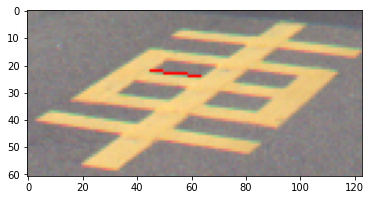

In [3]:
src = tmp.copy()
gray = src.astype('uint8')
gray = cv2.cvtColor(gray, cv2.COLOR_BGR2GRAY)
lines = lsd(gray)
for i in range(lines.shape[0]):
    pt1 = (int(lines[i, 0]), int(lines[i, 1]))
    print(lines[i])
    pt2 = (int(lines[i, 2]), int(lines[i, 3]))
    width = lines[i, 4]
    cv2.line(src, pt1, pt2, (0, 0, 255), int(np.ceil(width / 10)))
    break
plt.imshow(src[...,::-1])

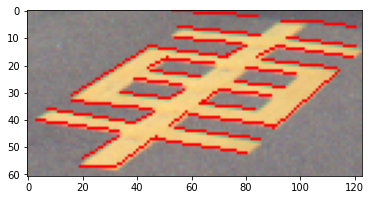

In [4]:
src = tmp.copy()
gray = src.astype('uint8')
gray = cv2.cvtColor(gray, cv2.COLOR_BGR2GRAY)
lines = lsd(gray)
for i in range(lines.shape[0]):
    pt1 = (int(lines[i, 0]), int(lines[i, 1]))
    pt2 = (int(lines[i, 2]), int(lines[i, 3]))
    width = lines[i, 4]
    cv2.line(src, pt1, pt2, (0, 0, 255), int(np.ceil(width / 10)))
plt.imshow(src[...,::-1])

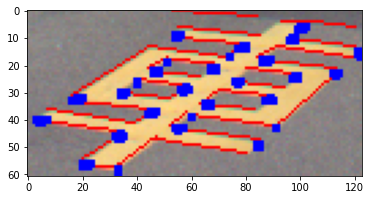

In [5]:
src = tmp.copy()
lines = lsd(gray)
img = tmp.copy()
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.014)
dst = cv2.dilate(dst,None)
for i in range(lines.shape[0]):
    pt1 = (int(lines[i, 0]), int(lines[i, 1]))
    pt2 = (int(lines[i, 2]), int(lines[i, 3]))
    width = lines[i, 4]
    cv2.line(src, pt1, pt2, (0, 0, 255), int(np.ceil(width / 8)))
# Threshold for an optimal value, it may vary depending on the image.
src[dst>0.1*dst.max()]=[255,0,0]
plt.imshow(src[...,::-1])

# With PIL

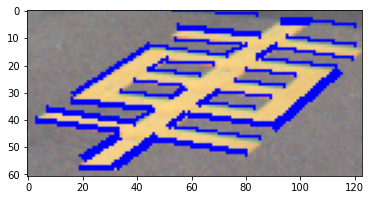

In [6]:
from PIL import Image, ImageDraw
img = Image.open(fp)
draw = ImageDraw.Draw(img)
for i in range(lines.shape[0]):
    pt1 = (int(lines[i, 0]), int(lines[i, 1]))
    pt2 = (int(lines[i, 2]), int(lines[i, 3]))
    width = lines[i, 4]
    draw.line((pt1, pt2), fill=(0, 0, 255), width=int(np.ceil(width / 2)))
plt.imshow(img)